-------------------------------------------------------

# **COMMENT TOXICITY CLASSIFIER**



-------------------------------------------------------

## **Importing Essential Libraries**

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



## **Loading the Data**
#### *Ref: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge*



In [ ]:
df = pd.read_csv(os.path.join("/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge",'train.csv', 'train.csv'))

## **Exploratory Data Analysis**

In [ ]:
np.shape(df)

(159571, 8)

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
df.isnull().sum()

id                 0
comment_text       0
toxic              0
severe_toxic       0
obscene            0
threat             0
insult             0
identity_hate      0
multiple_labels    0
dtype: int64

In [ ]:
df.iloc[2395]['comment_text']

'"\n\n You Are an Awesome wikipedian \n\n  Some shit Some droppings of filthy muck mess to feel you better. Don\'t bother myself    Summon "'

In [ ]:
df[df.columns[2:]].iloc[2395]

toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    0
Name: 2395, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
for col in df.select_dtypes("int"):
    print(df[col].value_counts())
    print("----------------------")

0    144277
1     15294
Name: toxic, dtype: int64
----------------------
0    157976
1      1595
Name: severe_toxic, dtype: int64
----------------------
0    151122
1      8449
Name: obscene, dtype: int64
----------------------
0    159093
1       478
Name: threat, dtype: int64
----------------------
0    151694
1      7877
Name: insult, dtype: int64
----------------------
0    158166
1      1405
Name: identity_hate, dtype: int64
----------------------


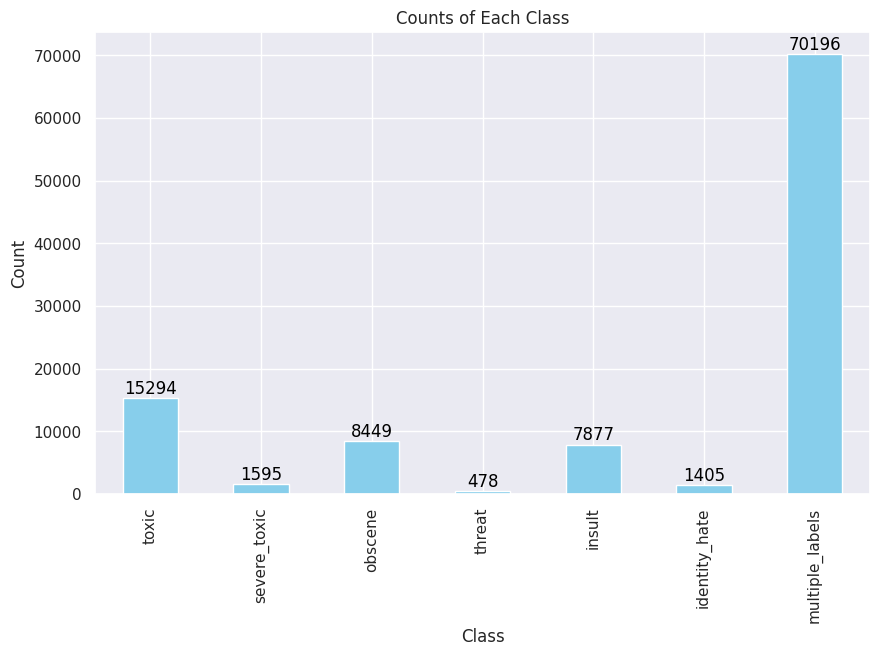

In [ ]:
import matplotlib.pyplot as plt

class_counts = df.iloc[:, 2:].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = class_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

for i, v in enumerate(class_counts):
    ax.text(i, v + 100, str(v), color='black', ha='center', va='bottom')

plt.show()

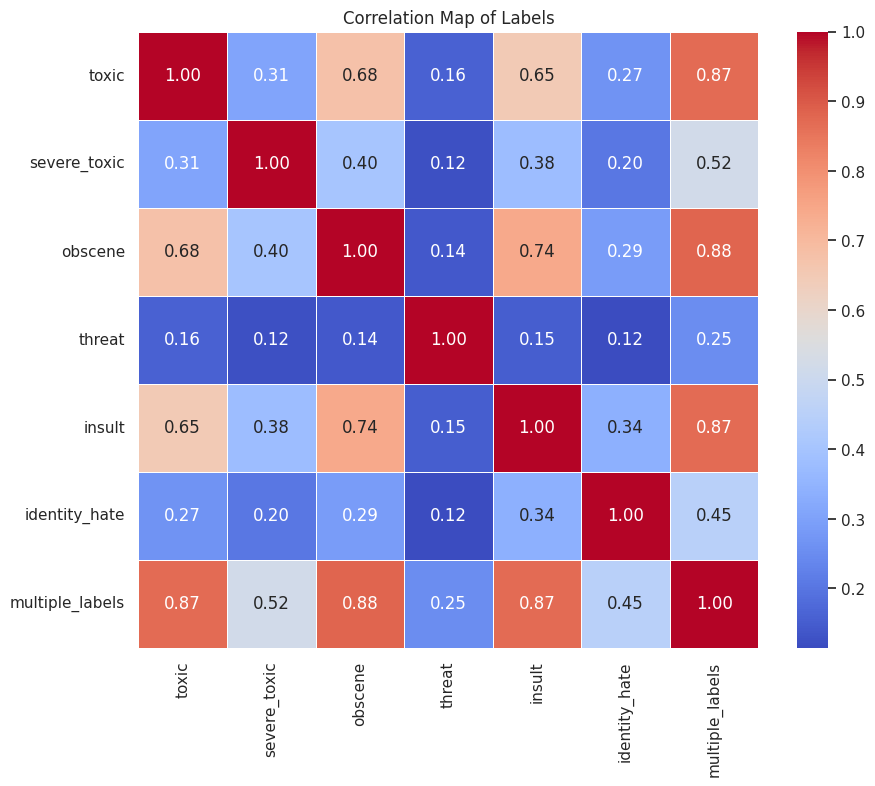

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.iloc[:, 2:].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map of Labels')
plt.show()

## **Pre-Processing**

*Using Helper Function TextVectorization*

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
type(X.values)

numpy.ndarray

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
# Sample example
vectorizer('Hello world, today is a fine day')[:6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([288, 263, 577,   9,   6, 637])>

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
len(X)

159571

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

## **Dataset Generation After Vectorization**

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(64)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
dataset.as_numpy_iterator().next()

(array([[ 8083, 48857,  1383, ...,     0,     0,     0],
        [  387,   147,     6, ...,     0,     0,     0],
        [34620,   964, 30297, ...,     0,     0,     0],
        ...,
        [  176,   637,    27, ...,     0,     0,     0],
        [    8,    55,    65, ...,     0,     0,     0],
        [    5, 14345,    68, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],

## **Train and Test Split**

In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[    9,    12,     2, ...,     0,     0,     0],
        [    8,    74,    30, ...,     0,     0,     0],
        [ 1506,    36,    76, ...,     0,     0,     0],
        ...,
        [    2, 14215,     4, ...,     0,     0,     0],
        [ 4419, 12213,   425, ...,     0,     0,     0],
        [    2,   177, 10586, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],

##**Model**
*Bidirectional - Long Short Term Memory / (LSTM)*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

Epoch 1/10
1745/1745 [==============================] - 319s 177ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0458 - val_accuracy: 0.9935
Epoch 2/10
1745/1745 [==============================] - 199s 114ms/step - loss: 0.0454 - accuracy: 0.9930 - val_loss: 0.0400 - val_accuracy: 0.9944
Epoch 3/10
1745/1745 [==============================] - 186s 107ms/step - loss: 0.0401 - accuracy: 0.9913 - val_loss: 0.0362 - val_accuracy: 0.9944
Epoch 4/10
1745/1745 [==============================] - 176s 101ms/step - loss: 0.0368 - accuracy: 0.9942 - val_loss: 0.0324 - val_accuracy: 0.9940
Epoch 5/10
1745/1745 [==============================] - 176s 101ms/step - loss: 0.0328 - accuracy: 0.9807 - val_loss: 0.0276 - val_accuracy: 0.9942
Epoch 6/10
1745/1745 [==============================] - 173s 99ms/step - loss: 0.0289 - accuracy: 0.9680 - val_loss: 0.0250 - val_accuracy: 0.9943
Epoch 7/10
1745/1745 [==============================] - 171s 98ms/step - loss: 0.0264 - accuracy: 0.9265 - val_lo

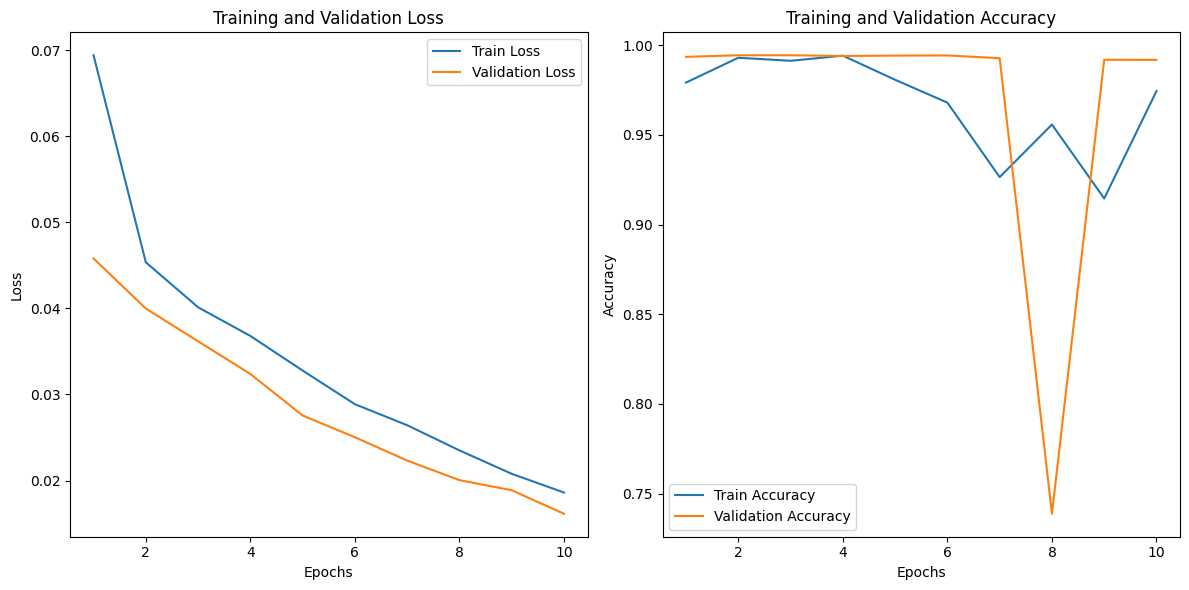

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Train your model
history = model.fit(train, epochs=10, validation_data=val)

# Access the training and validation loss and accuracy for each epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Save the trained model
model.save('/content/drive/MyDrive/toxicity.h5')

## **Metric Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test data and make predictions
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    true_labels.extend(y_true)
    predicted_labels.extend(yhat)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

2/2 [==============================] - 0s 37ms/step


In [ ]:
# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(true_labels, (predicted_labels > 0.5).astype(int))
recall = recall_score(true_labels, (predicted_labels > 0.5).astype(int))
precision = precision_score(true_labels, (predicted_labels > 0.5).astype(int))
f1 = f1_score(true_labels, (predicted_labels > 0.5).astype(int))

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("AUC-ROC Score:", auc)

Accuracy: 0.9938608601070951
Recall: 0.9203951191167926
Precision: 0.9100833093938523
F1 Score: 0.9152101690018778
AUC-ROC Score: 0.9990098399246801


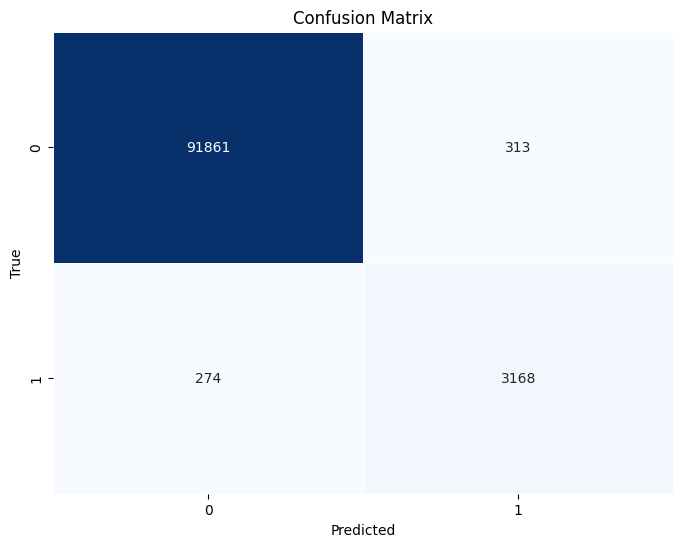

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, (predicted_labels > 0.5).astype(int))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

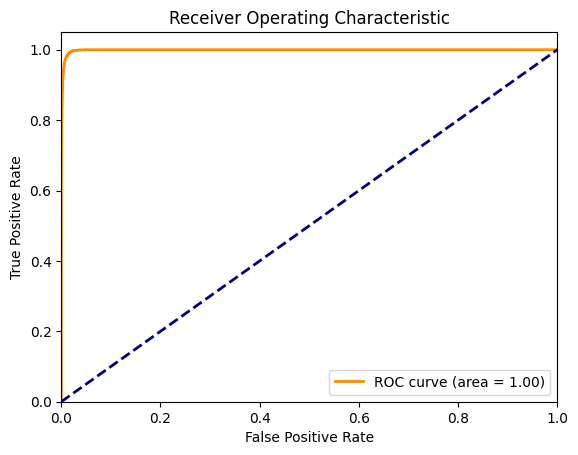

In [ ]:
# Calculate the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
auc = roc_auc_score(true_labels, predicted_labels)

# Plot the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##**Predictions**

In [ ]:
input_text = vectorizer('I will rape you')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/toxicity.h5')

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res = model.predict(np.expand_dims(input_text,0))
print(res)

1/1 [==============================] - 1s 707ms/step
[[0.7381432  0.05131497 0.02281709 0.6104831  0.07399026 0.07874382]]


> # **Deployment**


In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2

In [ ]:
pip install Jinja2

In [ ]:
import gradio as gr
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import TextVectorization
import os

MAX_FEATURES = 200000  # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/toxicity.h5')

# Define your DataFrame (df) with appropriate columns
train_path = os.path.join("/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge", 'train.csv','train.csv')
df = pd.read_csv(train_path)

# Adapt the TextVectorization layer with training data
train_comments = df['comment_text'].values  # Assuming the comments are in a column named 'comment_text'
vectorizer.adapt(train_comments)

def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

    return text

demo = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
    outputs="text"
)

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e7e3071a45a9005dc9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 51ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e7e3071a45a9005dc9.gradio.live
